In [1]:
%pylab inline

from soda import *
import pdb

/usr/lib/python3/dist-packages/matplotlib/__init__.py:760: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now '/home/ngaravito/.config'/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


# To - DO 

1. Check that orbits and soda gave the same orbit.
2. Implement orbit with LMC potential. LMC1, LMC2, LMC3, LMC4 etc.. 
3. Make orbit projections.
4. Make separate LMC integration!

In [2]:
time = 4
pos_sat = [-87.43, -0.51, 37.31]
vel_sat = [16.55, 48.46, -31.33]
pos_host = [0, 0, 0]
vel_host = [0, 0, 0]
fuck_model = ['hernquist', 0.001, 5, 5]
host_model = ['NFW', 1.2, 261/26.47, 9.86]
disk_params = [6.5E10, 3.1, 0.53]
bulge_params = [1E10, 0.7]


In [3]:
t, posNGC, velNGC = leapfrog.integrate_mw(time, pos_sat, vel_sat, host_model, disk_params, bulge_params, direction=1)

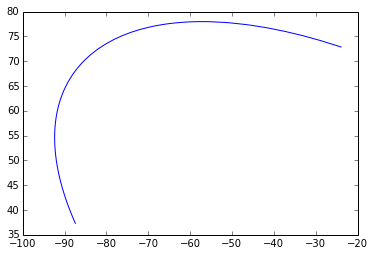

In [4]:
plot(posNGC[:,0], posNGC[:,2])
#plot(posMW[:,0], posMW[:,1])

In [5]:
pos_sat2 = [1E6, 0, 0]
vel_sat2 = [0, 0, 0]

In [6]:
LMC_model = ['hernquist', 0.001, 5, 5]
pos_LMC = [-87.43, -0.51, 37.31]
vel_LMC = [16.55, 48.46, -31.33]

In [9]:
t, posLMC, velLMC, posMW, velMW, posNGC2, velNGC2 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, pos_sat=pos_LMC,\
                                                                           vel_sat=vel_LMC, sat_model=LMC_model)

[16.55, 48.46, -31.33]


UnboundLocalError: local variable 'sat_model' referenced before assignment

(35, 80)

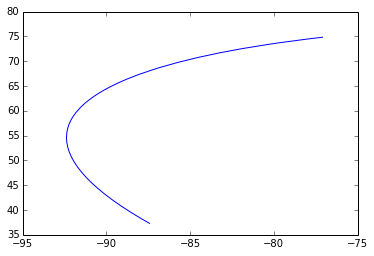

In [13]:
#plot(posNGC[:,0], posNGC[:,2])
plot(posNGC2[:,0], posNGC2[:,2])
xlim(-95, -75)
ylim(35, 80)

In [7]:
NGC2419_orbit = np.loadtxt('../../orbits/data/NGC2419/NGC2419_MW_sat.txt')
NGC2419_orbit_host = np.loadtxt('../../orbits/data/NGC2419/NGC2419_MW_host.txt')

In [8]:
shape(NGC2419_orbit)

(200, 7)

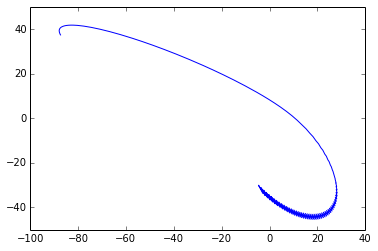

In [9]:
plot(NGC2419_orbit[:,1], NGC2419_orbit[:,3])

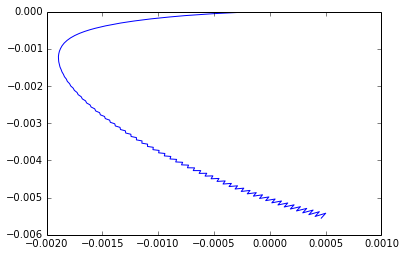

In [10]:
plot(NGC2419_orbit_host[:,1], NGC2419_orbit_host[:,2])

In [62]:
rest_mass(h=3, z=5)

{'z': 5, 'h': 3, 'kwargs': {'z': 5, 'h': 3}}


In [11]:
def extract(dct, namespace=None):
    if not namespace: namespace = globals()
    namespace.update(dct)


In [12]:
def rest_mass(**kwargs):
    #print(type(kwargs))
    #print(kwargs.items())
    extract(kwargs)
    print(z)

    if 'x' in kwargs:
        print(x)
        print(x[0])

In [24]:
rest_mass(z=4, x=['hola', 5, 6])

4
['hola', 5, 6]
hola
